In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from scipy.stats import skew
from scipy.stats import boxcox
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

plt.style.use('science')

# For figure aesthetics
plt.rcParams['mathtext.fontset'] = 'custom'  
plt.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'  
plt.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'  
plt.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'  
plt.rcParams['font.size'] = 16
plt.rcParams['mathtext.fontset'] = 'stix'  
plt.rcParams['font.family'] = 'STIXGeneral' 

In [2]:
feature_names = np.array([
    r'$N_{area}$',
    r'$C_{area}$',
    r'N/C-ratio',
    r'$N_{Brightness}$',
    r'$C_{Brightness}$',
    r'$N_{short}$',
    r'$N_{long}$',
    r'$N_{elong}$',
    r'$N_{round}$',
    r'$C_{short}$',
    r'$C_{long}$',
    r'$C_{elong}$',
    r'$C_{round}$',
    r'$N_{perimeter}$',
    r'$C_{perimeter}$',
    r'$N_{pos}$',
    r'$N_{max}$',
    r'$N_{min}$',
    r'$C_{max}$',
    r'$C_{min}$',
])

feature_order = [0, 3, 5, 6, 7, 8, 13, 15, 16, 17,
                 1, 4, 9, 10, 11, 12, 14, 18, 19, 2]

print([feature_names[i] for i in feature_order])

['$N_{area}$', '$N_{Brightness}$', '$N_{short}$', '$N_{long}$', '$N_{elong}$', '$N_{round}$', '$N_{perimeter}$', '$N_{pos}$', '$N_{max}$', '$N_{min}$', '$C_{area}$', '$C_{Brightness}$', '$C_{short}$', '$C_{long}$', '$C_{elong}$', '$C_{round}$', '$C_{perimeter}$', '$C_{max}$', '$C_{min}$', 'N/C-ratio']


In [44]:
df = pd.read_excel('./data/new_database_results.xls')
X = df.values[:, 1:-1]
y = df.values[:, -1]

In [4]:
df

,ID,Kerne_A,Cyto_A,K/C,Kerne_Ycol,Cyto_Ycol,KerneShort,KerneLong,KerneElong,KerneRund,...,CytoElong,CytoRund,KernePeri,CytoPeri,KernePos,KerneMax,KerneMin,CytoMax,CytoMin,Class
0,153958345-153958392-001.BMP,803.500,27804.125,0.028087,85.866083,192.524631,29.832191,34.828150,0.856554,0.843403,...,0.750175,0.604273,101.375,673.500,0.230067,44,37,649,655,1
1,153960256-153960295-002.BMP,610.125,18067.875,0.032665,81.531353,153.439838,25.319871,30.805844,0.821918,0.818583,...,0.866065,0.589351,85.250,597.000,0.043701,36,26,502,504,1
2,157181281-157181308-001.BMP,990.375,79029.875,0.012377,77.843655,118.001177,33.552901,38.327536,0.875425,0.858397,...,0.815760,0.794843,111.750,1059.125,0.141150,53,37,2267,2500,1
3,157181387-157181418-001.BMP,554.500,98941.000,0.005573,70.054545,139.359845,23.799254,29.832868,0.797753,0.793271,...,0.770601,0.695414,81.000,1264.500,0.079801,38,29,2885,2960,1
4,157181525-157181540-001.BMP,636.375,99663.250,0.006345,76.950949,137.748293,25.946189,31.256999,0.830092,0.829332,...,1.215871,1.071126,87.875,1250.625,0.121304,36,24,2978,3159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,153831471-153831486-004.BMP,3708.625,1985.000,0.651364,127.264411,164.157063,61.664414,82.219219,0.750000,0.698516,...,0.677242,0.243720,293.000,283.750,0.125820,116,91,72,94,7
913,153916114-153916150-001.BMP,2813.750,2245.875,0.556118,79.372458,137.659316,47.320650,83.240615,0.568480,0.517041,...,0.763544,0.308605,223.625,303.250,0.180499,98,88,64,72,7
914,153916114-153916167-001.BMP,2551.875,2153.875,0.542289,76.059866,99.431989,46.259154,76.006579,0.608620,0.562428,...,0.670235,0.302660,269.125,255.500,0.196989,147,111,71,111,7
915,153916114-153916167-002.BMP,2064.500,2256.250,0.477811,83.839086,148.486366,42.776006,71.021124,0.602300,0.521135,...,0.600038,0.274484,179.250,264.500,0.147333,99,68,66,73,7


In [16]:
np.min(X, axis=0)

array([316.875, 467.875, 0.0039904508, 17.9139465875, 69.8897017445,
       13.973913921, 19.4164878389, 0.3078055965, 0.2706102825,
       29.4578497051, 44.6430285711, 0.2109754706, 0.06699333, 60.75,
       136.125, 0.0033635817, 19, 13, 14, 21], dtype=object)

In [5]:
stats = pd.DataFrame()
stats['Features'] = feature_names
stats['mean'] = np.mean(X, axis=0)
stats['var'] = np.var(X, axis=0)
stats['skewness'] = [skew(X[:, i]) for i in range(20)]

stats

,Features,mean,var,skewness
0,$N_{area}$,2990.83,3.5237e+06,1.125386
1,$C_{area}$,14053.9,4.13983e+08,2.258539
2,N/C-ratio,0.35661,0.0454744,0.061509
3,$N_{Brightness}$,90.4901,473.864,0.368802
4,$C_{Brightness}$,139.357,624.961,0.656798
5,$N_{short}$,52.4973,351.358,0.503051
6,$N_{long}$,71.1935,539.604,0.158191
7,$N_{elong}$,0.750395,0.0244753,-0.174399
8,$N_{round}$,0.705578,0.0238899,-0.165960
9,$C_{short}$,118.13,5164.63,1.479802


In [7]:
df.groupby('Class').ID.nunique()

Class
1     74
2     70
3     98
4    182
5    146
6    197
7    150
Name: ID, dtype: int64

In [8]:
new_df = pd.DataFrame()
for i in range(1, 21):
    new_df['Feature{}'.format(i)] = df.values[:, i]
new_df['Label1'] = df.values[:, -1]
label2 = []
for l in df.values[:, -1]:
    label2.append(1) if l in [1, 2, 3] else label2.append(0)
new_df['Label2'] = label2

In [9]:
df.columns

Index(['ID', 'Kerne_A', 'Cyto_A', 'K/C', 'Kerne_Ycol', 'Cyto_Ycol',
       'KerneShort', 'KerneLong', 'KerneElong', 'KerneRund', 'CytoShort',
       'CytoLong', 'CytoElong', 'CytoRund', 'KernePeri', 'CytoPeri',
       'KernePos', 'KerneMax', 'KerneMin', 'CytoMax', 'CytoMin', 'Class'],
      dtype='object')

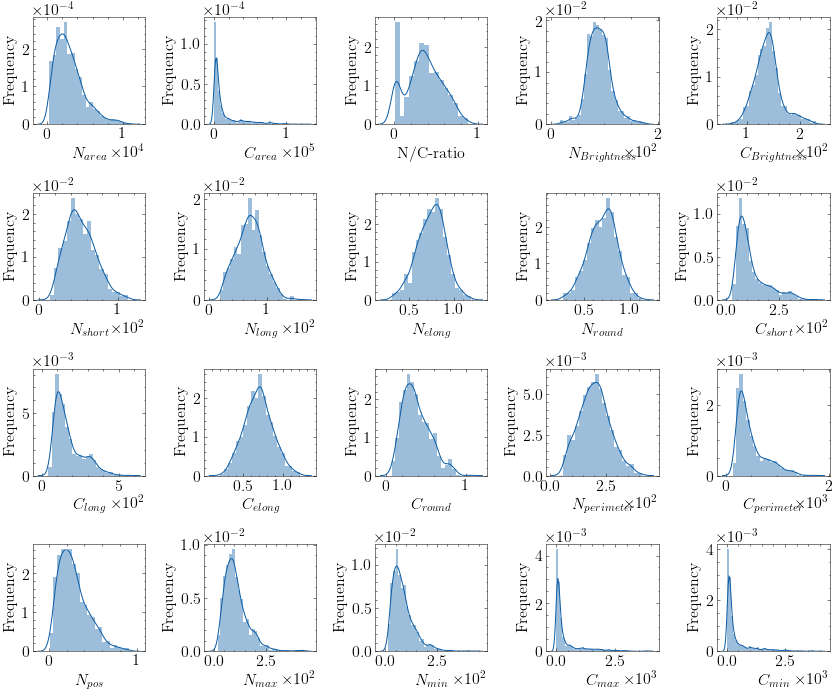

In [14]:
fig, axes = plt.subplots(4, 5, figsize=(12, 10))

for i, ax in enumerate(axes.flatten()):
    sns.distplot(X[:, i], ax=ax, norm_hist=False)
    ax.set_xlabel(feature_names[i])
    ax.set_ylabel('Frequency')
    ax.ticklabel_format(axis='both', scilimits=(0, 0), style='sci')
plt.tight_layout()
plt.savefig('./Figures/FeatHists.pdf')

In [64]:
predictor_skewness = [skew(X[:, i]) for i in range(20)]
predictors_for_log_transform = [
    j for j, gamma_j in enumerate(predictor_skewness) if abs(gamma_j) > 0.1
]

print('Apply log transform on: {}'.format(feature_names[predictors_for_log_transform]))

Xtransf = X.copy().astype(float)
for j in predictors_for_log_transform:
    # Xtransf[:, j] = np.log(Xtransf[:, j])
    Xtransf[:, j], L = boxcox(Xtransf[:, j])
    print(feature_names[j], predictor_skewness[j], L)
    
Xtransf = (Xtransf - np.min(Xtransf, axis=0)) / (np.max(Xtransf, axis=0) - np.min(Xtransf, axis=0))

Apply log transform on: ['$N_{area}$' '$C_{area}$' '$N_{Brightness}$' '$C_{Brightness}$'
 '$N_{short}$' '$N_{long}$' '$N_{elong}$' '$N_{round}$' '$C_{short}$'
 '$C_{long}$' '$C_{elong}$' '$C_{round}$' '$N_{perimeter}$'
 '$C_{perimeter}$' '$N_{pos}$' '$N_{max}$' '$N_{min}$' '$C_{max}$'
 '$C_{min}$']
$N_{area}$ 1.1253863160331063 0.27786094997078004
$C_{area}$ 2.258539033149549 -0.1687658550553462
$N_{Brightness}$ 0.36880229809322435 0.771674474459897
$C_{Brightness}$ 0.6567979932380511 0.05629958052609988
$N_{short}$ 0.5030513754415707 0.3913168241287445
$N_{long}$ 0.15819067391579952 0.7819305267203955
$N_{elong}$ -0.17439895316006424 1.2513262970090333
$N_{round}$ -0.16596011346189987 1.2210626610579292
$C_{short}$ 1.479802457751428 -0.42824842765320653
$C_{long}$ 1.1919600760685456 -0.37601901514932595
$C_{elong}$ 0.12294101122670159 0.8044232508747398
$C_{round}$ 0.7011322651544633 0.3118542711947958
$N_{perimeter}$ 0.2663970213016993 0.6609396330719752
$C_{perimeter}$ 1.34791443744

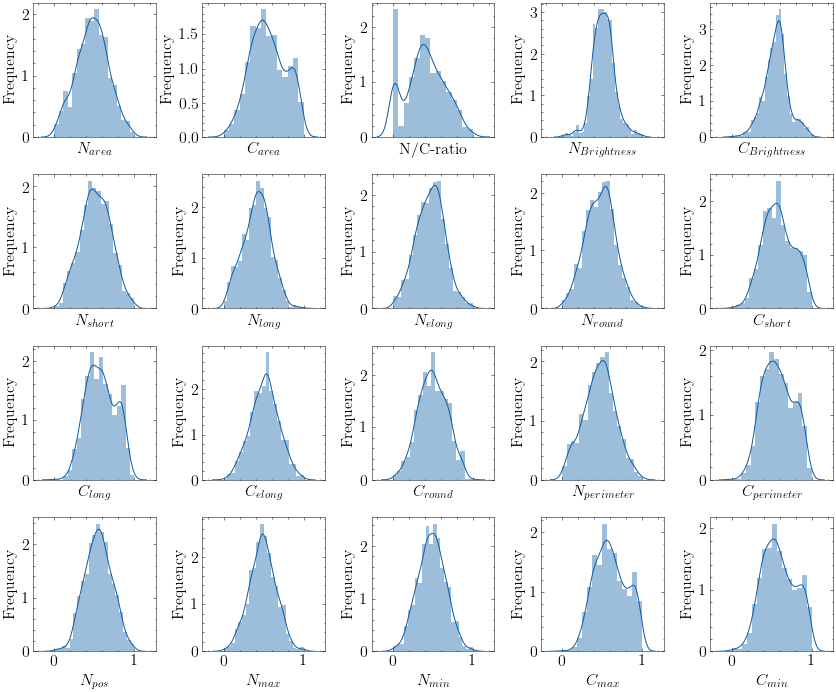

In [65]:
fig, axes = plt.subplots(4, 5, figsize=(12, 10), sharex=True)

for i, ax in enumerate(axes.flatten()):
    sns.distplot(Xtransf[:, i], ax=ax, norm_hist=False)
    ax.set_xlabel(feature_names[i])
    ax.set_ylabel('Frequency')
plt.tight_layout()
plt.savefig('./Figures/FeatTransfHist.pdf')

In [60]:
stats = pd.DataFrame()
stats['Features'] = feature_names
stats['mean'] = np.mean(Xtransf, axis=0)
stats['var'] = np.var(Xtransf, axis=0)
stats['skewness'] = [skew(Xtransf[:, i]) for i in range(20)]

stats

,Features,mean,var,skewness
0,$N_{area}$,0.475167,0.038906,-0.025213
1,$C_{area}$,0.554797,0.047783,0.057973
2,N/C-ratio,0.400019,0.058522,0.061509
3,$N_{Brightness}$,0.514344,0.018294,0.090600
4,$C_{Brightness}$,0.557618,0.022325,0.002184
5,$N_{short}$,0.516405,0.035101,-0.021084
6,$N_{long}$,0.415966,0.029059,-0.036390
7,$N_{elong}$,0.466068,0.031534,-0.021821
8,$N_{round}$,0.471225,0.032266,-0.033648
9,$C_{short}$,0.583484,0.037068,0.053024


In [76]:
y1 = new_df['Label1'].values
y2 = new_df['Label2'].values

means_multi = [np.mean(Xtransf[np.where(y1 == i)[0], :], axis=0)[..., np.newaxis] for i in np.unique(y1)]
means_bin = [np.mean(Xtransf[np.where(y2 == i)[0], :], axis=0)[..., np.newaxis] for i in np.unique(y2)]

var_multi = [np.var(Xtransf[np.where(y1 == i)[0], :], axis=0)[..., np.newaxis] for i in np.unique(y1)]
var_bin = [np.var(Xtransf[np.where(y2 == i)[0], :], axis=0)[..., np.newaxis] for i in np.unique(y2)]

In [78]:
class_conditional_analysis_multi = pd.DataFrame()
Mmulti = np.concatenate(means_multi, axis=1)
Vmulti = np.concatenate(var_multi, axis=1)

for i in range(7):
    class_conditional_analysis_multi['Mean C{}'.format(i + 1)] = Mmulti[:, i]
    
for i in range(7):
    class_conditional_analysis_multi['Var C{}'.format(i + 1)] = Vmulti[:, i]
    
class_conditional_analysis_multi

,Mean C1,Mean C2,Mean C3,Mean C4,Mean C5,Mean C6,Mean C7,Var C1,Var C2,Var C3,Var C4,Var C5,Var C6,Var C7
0,0.119444,0.283383,0.323853,0.648156,0.583355,0.491662,0.502155,0.003937,0.005465,0.011116,0.020458,0.018107,0.019758,0.014358
1,0.904082,0.868482,0.424722,0.691453,0.566743,0.419174,0.321758,0.003292,0.002393,0.012339,0.010391,0.011550,0.017266,0.016364
2,0.008854,0.030932,0.387972,0.299381,0.425225,0.546281,0.678587,0.000048,0.000252,0.013571,0.013571,0.018333,0.026177,0.022310
3,0.359312,0.361184,0.535991,0.559521,0.524912,0.534490,0.556598,0.013524,0.015761,0.022303,0.010482,0.009224,0.016839,0.011410
4,0.526432,0.508785,0.536727,0.581411,0.533590,0.578336,0.576749,0.018760,0.017541,0.044309,0.013417,0.013604,0.029518,0.017750
5,0.204035,0.355741,0.380060,0.682577,0.617520,0.522989,0.525872,0.006274,0.008222,0.013378,0.019186,0.017431,0.019346,0.017328
6,0.108495,0.235254,0.296935,0.544818,0.495844,0.442391,0.460956,0.002411,0.003445,0.010442,0.016834,0.014089,0.016942,0.011211
7,0.549068,0.514635,0.448025,0.512478,0.480650,0.425118,0.397519,0.031299,0.030475,0.044856,0.025431,0.022374,0.028640,0.029129
8,0.603537,0.548219,0.444740,0.510463,0.484757,0.421701,0.391583,0.032765,0.032821,0.040481,0.024603,0.022655,0.026791,0.028768
9,0.892108,0.848433,0.382014,0.694802,0.602330,0.467219,0.438500,0.004465,0.004315,0.017234,0.009487,0.010129,0.013254,0.011935


In [81]:
class_conditional_analysis_bin = pd.DataFrame()
Mbin = np.concatenate(means_bin, axis=1)
Vbin = np.concatenate(var_bin, axis=1)

for i in range(2):
    class_conditional_analysis_bin['Mean C{}'.format(i + 1)] = Mbin[:, i]
    
for i in range(2):
    class_conditional_analysis_bin['Var C{}'.format(i + 1)] = Vbin[:, i]
    
class_conditional_analysis_bin

,Mean C1,Mean C2,Var C1,Var C2
0,0.556022,0.249642,0.022693,0.015029
1,0.502859,0.699664,0.033781,0.058329
2,0.482927,0.168767,0.039705,0.038357
3,0.544081,0.431401,0.012477,0.025171
4,0.569134,0.525497,0.019471,0.028886
5,0.587106,0.319200,0.023131,0.015656
6,0.485696,0.221471,0.016670,0.012226
7,0.454551,0.498190,0.028556,0.038440
8,0.452580,0.523230,0.027978,0.040553
9,0.551424,0.672908,0.022276,0.067464


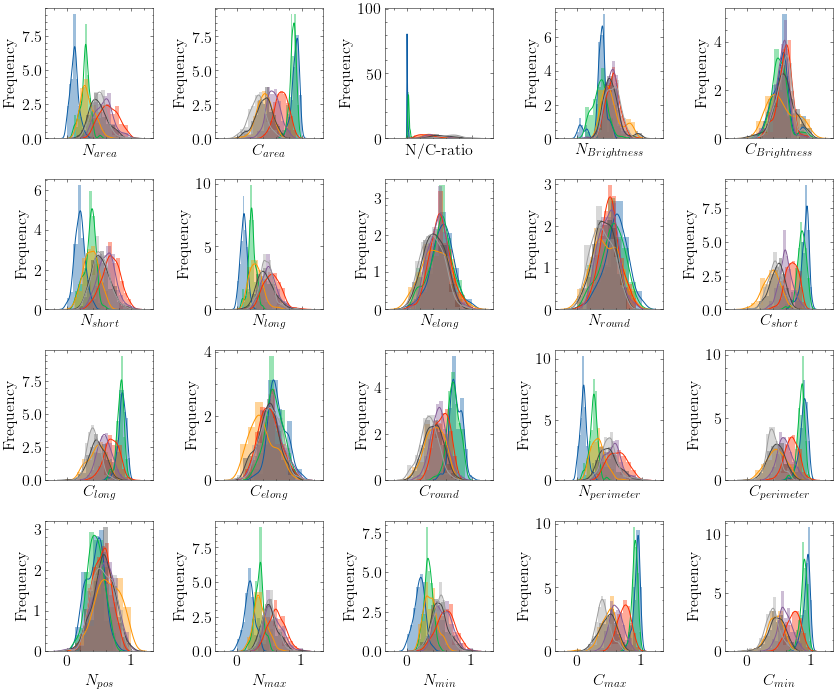

In [83]:
fig, axes = plt.subplots(4, 5, figsize=(12, 10), sharex=True)

for i, ax in enumerate(axes.flatten()):
    for k in np.unique(y1):
        sns.distplot(Xtransf[np.where(y1 == k)[0], i], ax=ax, norm_hist=False)
    ax.set_xlabel(feature_names[i])
    ax.set_ylabel('Frequency')
plt.tight_layout()
plt.savefig('./Figures/Multi_FeatTransfHist.pdf')

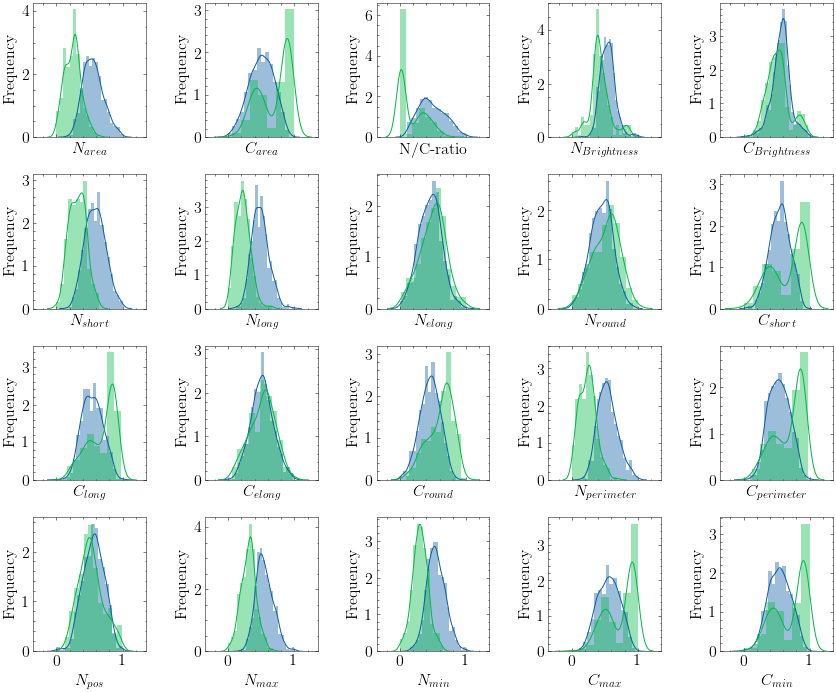

In [84]:
fig, axes = plt.subplots(4, 5, figsize=(12, 10), sharex=True)

for i, ax in enumerate(axes.flatten()):
    for k in np.unique(y2):
        sns.distplot(Xtransf[np.where(y2 == k)[0], i], ax=ax, norm_hist=False)
    ax.set_xlabel(feature_names[i])
    ax.set_ylabel('Frequency')
plt.tight_layout()
plt.savefig('./Figures/Bin_FeatTransfHist.pdf')

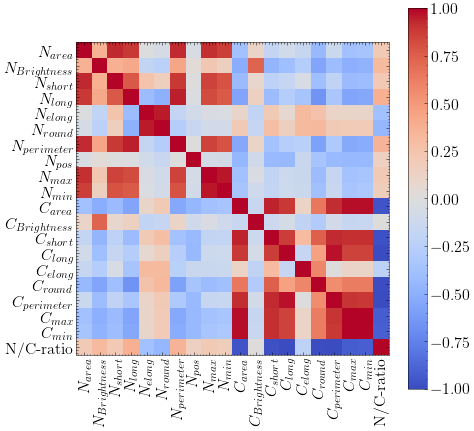

In [10]:
norm = mpl.colors.Normalize(vmin=-1, vmax=1)
cmap = mpl.cm.ScalarMappable(norm=norm, cmap='coolwarm')
cmap.set_array([])

R = df[df.columns[1:-1]].corr().values

fig, ax = plt.subplots(figsize=(7, 7))
im = ax.imshow(R[:, feature_order][feature_order, :], cmap='coolwarm')
fig.colorbar(cmap, ax=ax)
_ = plt.xticks([i for i in range(20)], labels=feature_names[feature_order], rotation=90)
_ = plt.yticks([i for i in range(20)], labels=feature_names[feature_order])
plt.savefig('./Figures/FeatCorr.pdf')